
# Ultimate Technologies, Inc. - Data Analysis Interview Challenge

The following notebook provides my solutions to Ultimate Technologies, Inc.'s Data Analysis Interview Challenge.

I will start by importing the packages I will need for my analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 500

%matplotlib inline

## Part I - Exploratory Data Analysis

The logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

## Part I - Analysis/Solutions

I will begin my analysis by importing the data from the `.json` file:

In [2]:
df_logins = pd.read_json('logins.json')
df_logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


The `.json` file appears to contain only one column of data providing date and time of each login within the geographical location.  To complete my analysis, I will convert the date/time column to an index and add a 'count' column, which I will set to a value of 1 for each entry:

In [3]:
df_logins = df_logins.set_index('login_time')
df_logins['count'] = 1
df_logins

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


Now that I have a dataframe with a date/time index and a count column, I can use the `.resample()` method to aggregate the numebr of logins on a 15-minute interval:

In [4]:
df_15min = df_logins['count'].resample('15Min').sum()
df_15min

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Name: count, Length: 9788, dtype: int64

Because the `resample()` resulted in only one column of data, it produced a series object.  I will next convert the results into a dataframe and add the hour, day, and month of each sample to aid in the analysis:

In [5]:
df_15min = pd.DataFrame({'count': df_15min.values, 'hour': df_15min.index.hour, 'day_number': df_15min.index.day, 'day_of_week': df_15min.index.dayofweek}, index=df_15min.index)
df_15min

,count,hour,day_number,day_of_week
login_time,,,,
1970-01-01 20:00:00,2,20,1,3
1970-01-01 20:15:00,6,20,1,3
1970-01-01 20:30:00,9,20,1,3
1970-01-01 20:45:00,7,20,1,3
1970-01-01 21:00:00,1,21,1,3
...,...,...,...,...
1970-04-13 17:45:00,5,17,13,0
1970-04-13 18:00:00,5,18,13,0
1970-04-13 18:15:00,2,18,13,0


In [6]:
df_15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 4 columns):
count          9788 non-null int64
hour           9788 non-null int64
day_number     9788 non-null int64
day_of_week    9788 non-null int64
dtypes: int64(4)
memory usage: 382.3 KB


It does not appear that the dataframe has any missing data.  Let's go ahead and vizualize the results:

### Number of Logins by Hour

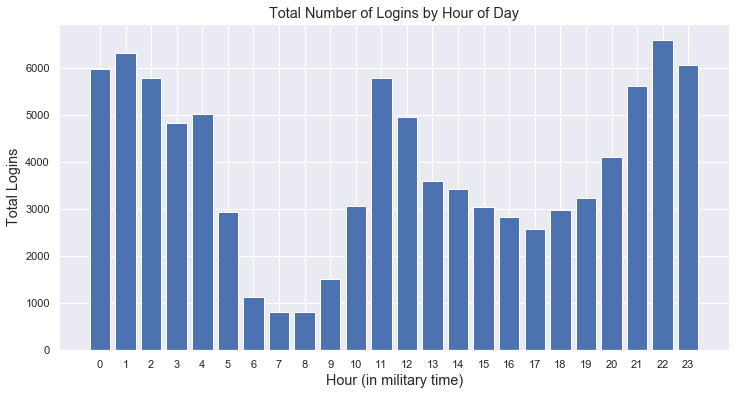

In [8]:
# group and calculate total number of logins by hour in day
df_hour = df_15min.groupby('hour').sum()

_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = plt.bar(df_hour.index, df_hour['count'])
_ = plt.title('Total Number of Logins by Hour of Day', size='large')
_ = plt.xlabel('Hour (in military time)', size='large')
_ = plt.ylabel('Total Logins', size='large')
_ = plt.xticks(df_hour.index)

The data demonstrates that the most logins occur during two different time periods: 11:00am - 1:00pm (people going out to lunch) and 9:00pm - 2:00am (people going to/from dinner, going out for the night, and/or coming home at closing time for restaurants/bars/clubs).

### Number of Logins by Day

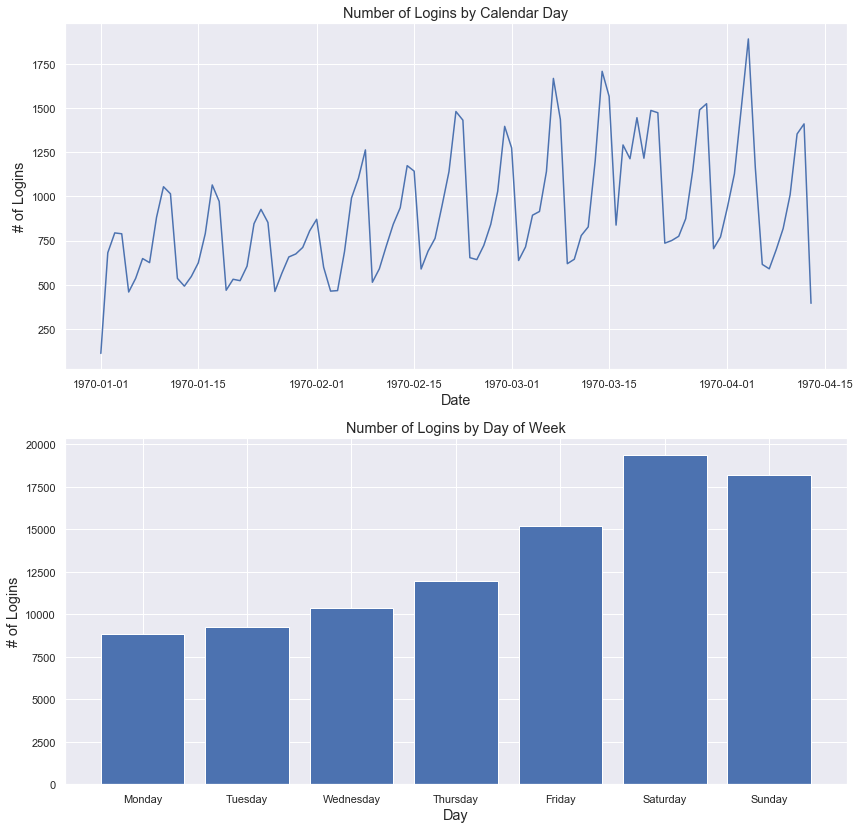

In [109]:
df_day = df_15min.groupby('day_of_week').sum()

_ = sns.set()
_ = plt.figure(figsize=(14,14))
_ = plt.subplot(2, 1, 1)
_ = plt.plot(df_15min['count'].resample('D').sum())
_ = plt.title('Number of Logins by Calendar Day', size='large')
_ = plt.xlabel('Date', size='large')
_ = plt.ylabel('# of Logins', size='large')

_ = plt.subplot(2, 1, 2)
_ = plt.bar(df_day.index, df_day['count'])
_ = plt.title('Number of Logins by Day of Week', size='large')
_ = plt.xlabel('Day', size='large')
_ = plt.ylabel('# of Logins', size='large')
_ = plt.xticks(df_day.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

The number of logins per day largely are driven by the day of the week with the exception of certain holidays (such as St. Patrick's Day as seen above, which is a popular holiday for people to go out to bars/restaurants).  The number of logins increase during the week as it approachs the weekend, when the most logins occur.

### Number of Logins by Week and Month of Year

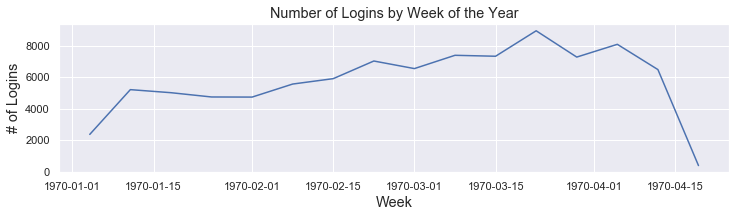

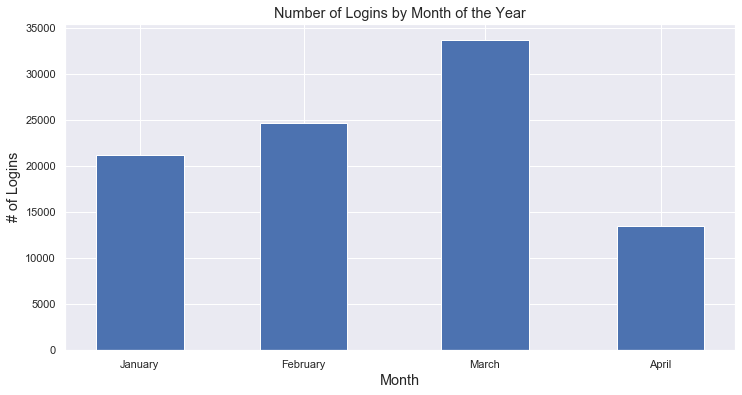

In [16]:
_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(df_15min['count'].resample('W').sum())
_ = plt.title('Number of Logins by Week of the Year', size='large')
_ = plt.xlabel('Week', size='large')
_ = plt.ylabel('# of Logins', size='large')

_ = sns.set()
_ = plt.figure(figsize=(12,6))
_ = plt.bar(df_15min['count'].resample('M').sum().index, df_15min['count'].resample('M').sum(), width=15.0)
_ = plt.title('Number of Logins by Month of the Year', size='large')
_ = plt.xlabel('Month', size='large')
_ = plt.ylabel('# of Logins', size='large')
_ = plt.xticks(df_15min['count'].resample('M').sum().index, ['January', 'February', 'March', 'April'])

It appears that the number of logins increased gradually during the first three months of the year.  This most likely has to do with the weather (assuming the geographical location is in the Northern Hemisphere where the average temperature increases from January - March).  The drop-off for April appears to be because the dataset cuts off mid-week and mid-month (on 4/13).

## Part 2 - Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.


### Question 1

*What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?*

### Answer

Determining the key measure of success largely is dependent upon the client's ultimate goal.  Here, I am provided with only a limited description stating that Ultimate desires "to encourage driver partners to be available in both cities."  The most likely scenario is that Ultimate currently is experiencing issues with a disproportionate number of partner drivers servicing one city over another at particular times (most likely Metropolis during weekdays and Gotham during weeknights due to demand).

Given this understanding, the likely best metric to measure driver availability throughout both cities is customer wait time within the region.  If the driver partners are all making themselves available in both cities at all times, then that should result in a more even geographical distribution of available drivers and, hence, less time on average for customers in the region to have to wait for the closest available driver.  So, I would measure the average customer wait time within a particular unit of time to observe whether the experiment successfully reduces that metric.  This would be particularly appealing because the wait time for each customer transaction can easily be measured and recorded accurately.

If Ultimate prioritizes profitability, however, I would use overall profitability (with consideration of the extra toll reimbursement costs) within a particular unit of time.  The success of the experiment would be measured by whether Ultimate's profitability increased during the time periods when it was reimbursing tolls to its drivers.  This may not be the best metric to evaluate the experiement given that we know that the particular demands in each city are unequal during certain days/times, meaning that an even distribution of drivers between the two cities during those time periods may not maximize profits for the company.

Finally, Ultimate could try to use the geo-location capabilities of its drivers' smartphones to periodically report each driver's specific location during a shift.  While this would report directly relevant data, it likely would not be comprehensive given that it would likely get compliance pushback from drivers complaining about privacy concerns and the intrusive nature of tracking that data.  I therefore would not recommend using this metric.

### Question 2

*Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:*

*a. how you will implement the experiment;*

*b. what statistical test(s) you will conduct to verify the significance of the
observation; and*

*c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.*

### Answer



To test the effectiveness of reimbursing all toll costs for drivers, I would set up a time period (preferably 6 months or longer to collect a large sample of data) where I would alternate between periods (likely on a weekly basis) when Ultimate did reimburse and did not reimburse its drivers for tolls incurred.  I would record the wait time for each customer request during this time period.

Once enough data has been collected, I would generate bootstrap samples with replacement for both datasets (the wait times when drivers were receiving toll reimbursements data and the wait times when drivers were not receiving toll reimbursements data) and calculate a distribution of the average wait times for both datasets over that time period.  I would then conduct a traditional hypothesis test with the null hypothesis being that the difference between the average wait time distributions of the two datasets is caused by random chance.  I would plot the average wait time distributions for both datasets and evaluate how much of the average wait time distribution for reimbursed tolls dataset falls outside of the 95% confidence interval of the average weight time distribution for the non-reimbursed tolls dataset (assuming the use of a standard p-value of 0.05 to measure significance).  I would then be able to determine how likely it is that reimbursing tolls to drivers significantly impacted (postively or negatively) the average weight time for customers.

When interpreting the results, I would not only analyze the overall average wait times for the entire region, but also how the average wait times were impacted within each city.  In particular, I would analyze the weekday and weeknight results for each of the cities because we know that the demands for rides fluctuates during the week (with Metropolis being more active during the day and Gotham more active at night).  I would want to see if the average wait time in Metropolis during weeknights and the average wait time in Gotham during weekdays decreased, as those numbers in particular may be an indication that reimbursing tolls is incentivizing the partner drivers to service those areas despite the lower demand.  I would also want to observe whether the average wait time in Metropolis during the weekdays and the average wait time in Gotham during the weeknights has not increased significantly, as that could lead to overall lower customer satisfaction since the demand in those cities during those time periods is higher.  These concerns aren't as prevalent over the weekend when the relative demand between the cities is more equal.

As for recommendations, I would inform Ultimate that overall the toll reimbursement experiment is working if it results in a reduction in the average customer wait time during those time periods.  I would certainly include in my recommendations a specific discussion of the weekday and weeknight time periods where the relative demands between the two cities are uneven and the potential risks in trying to encourage drivers to be available in both cities during those time periods (e.g., decreased customer satisfaction, decreased revenue).  The degree to which this would impact my recommendations, however, would depend on the results of the experiment.

## Part 3 - Predictive Modeling

*Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.*

*We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.*

*1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?*

*2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.*

*3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long-term rider retention (again, a few sentences will suffice).*

**Data Description**
-  **city**: city this user signed up in
-  **phone**: primary device for this user
-  **signup_date**: date of account registration; in the form ‘YYYYMMDD’
-  **last_trip_date**: the last time this user completed a trip; in the form ‘YYYYMMDD’
-  **avg_dist**: the average distance in miles per trip taken in the first 30 days after signup
-  **avg_rating_by_driver**: the rider’s average rating over all of their trips
-  **avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips
-  **surge_pct**: the percent of trips taken with surge multiplier > 1
-  **avg_surge**: The average surge multiplier over all of this user’s trips
-  **trips_in_first_30_days**: the number of trips this user took in the first 30 days after signing up
-  **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
-  **weekday_pct**: the percent of the user’s trips occurring during a weekday

## Part 3 - Analysis/Solutions

I will start by importing the dataset in a DataFrame to see how it looks:

In [3]:
# import json package
import json

# read json file into variable
with open('ultimate_data_challenge.json') as datafile:
    data = json.load(datafile)

# create dataframe
df_data = pd.DataFrame(data)
df_data.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Missing Data

It looks like the dataframe has 50,000 entries in total, with three features containing some `NaN` values.  Let's address those first:

#### phone

The dataset is missing the type of phone for just under 400 users.  Instead of speculating as to which kind of phone they had, I will simply change the `NaN` values to 'Unknown':

In [5]:
df_data['phone'] = df_data['phone'].fillna('Unknown')
df_data['phone'].value_counts()

iPhone     34582
Android    15022
Unknown      396
Name: phone, dtype: int64

#### avg_rating_by_driver

The dataset is missing 201 entries for this feature.  Let's examine the distribution of values in this dataset to get a better sense of how to address the `NaN` values:

In [6]:
df_data['avg_rating_by_driver'].value_counts()

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
3.2        2
2.7        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

Well over half the users received ratings of 5.0 from their drivers.  It therefore appears that a majority drivers will rate their users with a 5.0 most often. With such an overwhelming majority class, it makes sense to use that value for the 201 missing entries here:

In [7]:
df_data['avg_rating_by_driver'] = df_data['avg_rating_by_driver'].fillna(5.0)

#### avg_rating_of_driver

Unlike the other two features, we are missing significantly more values for this feature (almost 20%).  Let's take a look at the current distribution:

In [8]:
df_data['avg_rating_of_driver'].value_counts(dropna=False)

5.0    20771
NaN     8122
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.8        2
1.7        2
2.2        1
1.9        1
1.6        1
Name: avg_rating_of_driver, dtype: int64

Similar to the ratings given to users by drivers, it appears that most users will rate their drivers with a 5.0 rating most of the time.  We will use this majority value to replace the `NaN`s for this feature as well:

In [9]:
df_data['avg_rating_of_driver'] = df_data['avg_rating_of_driver'].fillna(5.0)

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Creating the 'Active' Label

Now that I have filled in the missing data, I will now create the label that we will use to build our model.  I will first convert the two date columns from strings to datetimes:

In [11]:
# convert the date features from strings to datetime values
df_data['signup_date'] = pd.to_datetime(df_data['signup_date'])
df_data['last_trip_date'] = pd.to_datetime(df_data['last_trip_date'])

The instructions are to consider a user 'active' if the user has taken a trip in the last 30 days.  Unfortunately, however, I was not given the exact time period the dataset was generated from.  Let's see when the latest trip in the dataset was recorded and use that date to create the 'retained' label:

In [12]:
# determine the lastest trip date in the dataset
df_data['last_trip_date'].sort_values(ascending=False)[:10]

45357   2014-07-01
22735   2014-07-01
14473   2014-07-01
38651   2014-07-01
45126   2014-07-01
14419   2014-07-01
38661   2014-07-01
45143   2014-07-01
45154   2014-07-01
45155   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

The latest trip date in the dataset is July 1st.  Thirty days prior to July 1st is June 1st, so we will use that date to generate the 'active' label as instructed:

In [13]:
# create the active column
df_data['active'] = df_data['last_trip_date'] >= '2014-06-01'

In [14]:
# quality control check that active column was generated correctly
df_data.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,True
6,Astapor,1,2014-01-24,5.0,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,False
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,False
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,False
9,Winterfell,1,2014-01-03,5.0,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,False


In [15]:
# calculate percentage of active users
len(df_data[df_data['active'] == True]) / 50000

0.37608

### Exploratory Data Analysis

Now that I have the 'active' label generated and know that 0.37608 of the users in the dataset are active, let's examine a few of the features in the dataset that I suspect may be correlative to whether a user is active.  First, I will split the data into separate dataframes for active and non-active users:

In [23]:
# create separate dataframes
df_active = df_data[df_data['active'] == True]
df_non_active = df_data[df_data['active'] == False]

#### # of Trips in First 30 Days

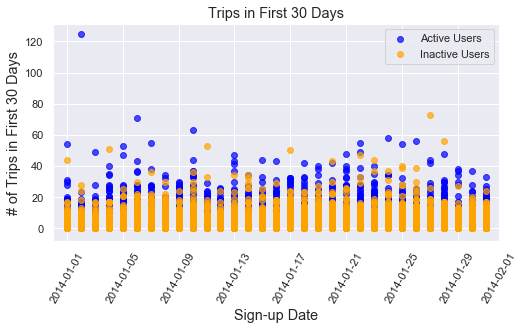

In [46]:
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.scatter(df_active['signup_date'], df_active['trips_in_first_30_days'], alpha=0.7, color='blue')
_ = plt.scatter(df_non_active['signup_date'], df_non_active['trips_in_first_30_days'], alpha=0.7, color='orange')
_ = plt.xlim('2013-12-31', '2014-02-01')
_ = plt.title('Trips in First 30 Days', size='large')
_ = plt.xlabel('Sign-up Date', size='large')
_ = plt.ylabel('# of Trips in First 30 Days', size='large')
_ = plt.xticks(rotation=60)
_ = plt.legend(['Active Users', 'Inactive Users'], loc='best')
_ = plt.show()

As suspected, it appears that taking more trips in the first 30 days makes it more likely that a user will continue to be active in the sixth month.

#### Average Distance per Trip

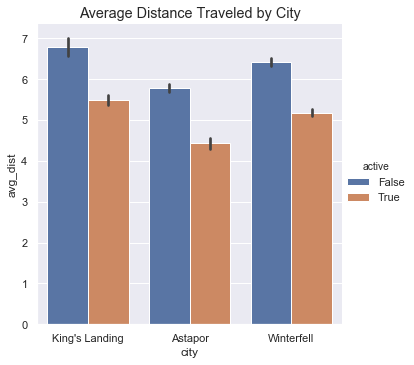

In [42]:
_ = sns.set()
_ = sns.catplot(x="city", y="avg_dist", hue='active', kind='bar', data=df_data)
_ = plt.title("Average Distance Traveled by City", size='large')

In all three cities, the inactive users averaged longer distance trips than the active users.

#### Ultimate Black Car Usage

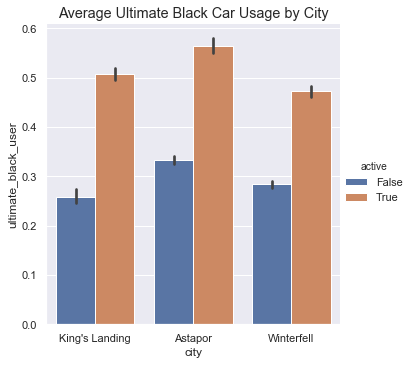

In [48]:
_ = sns.set()
_ = sns.catplot(x="city", y="ultimate_black_user", hue='active', kind='bar', data=df_data)
_ = plt.title("Average Ultimate Black Car Usage by City", size='large')

The active users also used the ultimate black car service more often on average than the inactive users.

#### Surge Percentage

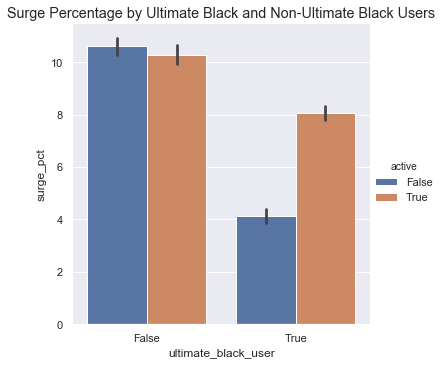

In [41]:
_ = sns.catplot(x="ultimate_black_user", y="surge_pct", hue='active', kind='bar', data=df_data)
_ = plt.title("Surge Percentage by Ultimate Black and Non-Ultimate Black Users", size='large')

Interestingly, the active users that use the ultimate black service take trips subject to surge pricing twice as often on average as the inactive users.  The non ultimate black users tended to take trips subject to surge pricing at the same percentage regardless of whether the user is active or inactive.

#### Exploratory Data Analysis Conclusions
-  The more that users book trips during the first month of signing up for Ultimate, the more likely they are to remain an active user;

-  Active users average shorter distance trips, indicating that they are using the service for more of their day-to-day ordinary course travel needs;

-  Active users tend to use the ultimate black car service at a much higher rate than inactive users; and

-  The active users that use the ultimate black car service are twice as likely to do so during surge pricing time periods than inactive users

### Data Preparation for Machine Learning

Next, I will prepare the data to build a predictive model.  I will begin by creating a new `df_ml` dataframe with our label, the 'active' feature, as the first column:

In [16]:
df_ml = pd.DataFrame({'active': df_data['active'].values})
df_ml

,active
0,True
1,False
2,False
3,True
4,False
...,...
49995,True
49996,False
49997,False
49998,False


#### Continuous Variables

Next, I will add the continuous variables to the `df_model` dataframe.  I will normalize those values before I add them to the dataframe to assist with model performance:

In [17]:
df_data.head(2)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False


In [18]:
# Import and instantiate MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalize the relevant features
x = df_data.iloc[:, [1, 3, 4, 7, 9, 10, 11]].values
x_scaled = min_max_scaler.fit_transform(x)

# Save the normalized values into a dataframe
df_scaled = pd.DataFrame(x_scaled, columns=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])

# add normalized dataframe to df_ml dataframe
df_ml = pd.concat([df_ml, df_scaled], axis=1)
df_ml.head(3)

,active,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,True,0.032,0.925,0.014286,0.154,0.462,0.022801,1.0
1,False,0.000,1.000,0.000000,0.000,0.500,0.051317,1.0
2,False,0.024,0.825,0.000000,0.000,1.000,0.004784,1.0


#### Categorical Variables

Next, I will convert the categorial variables into dummy variables and add them to the `df_ml` dataframe:

In [19]:
# create the dummy variables
df_dummies = pd.get_dummies(df_data[['city', 'phone']])

# add dummy variables to df_model dataframe
df_ml = pd.concat([df_ml, df_dummies], axis=1)
df_ml.head(3)

,active,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone
0,True,0.032,0.925,0.014286,0.154,0.462,0.022801,1.0,0,1,0,0,0,1
1,False,0.000,1.000,0.000000,0.000,0.500,0.051317,1.0,1,0,0,1,0,0
2,False,0.024,0.825,0.000000,0.000,1.000,0.004784,1.0,1,0,0,0,0,1


Finally, I will add the 'ultimate_black_user' feature, which is boolean data that can be added as-is:

In [20]:
df_ml['ultimate_black_user'] = df_data['ultimate_black_user'].values
df_ml.head(3)

,active,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone,ultimate_black_user
0,True,0.032,0.925,0.014286,0.154,0.462,0.022801,1.0,0,1,0,0,0,1,True
1,False,0.000,1.000,0.000000,0.000,0.500,0.051317,1.0,1,0,0,1,0,0,False
2,False,0.024,0.825,0.000000,0.000,1.000,0.004784,1.0,1,0,0,0,0,1,False


### Predictive Modeling

Next, I will try three different scikit-learn algorithms to see which one performs the best "out-of-the-box."  Referening the scikit-learn model selection flowchart recommends trying Linear SVC, KNeighbors, and an ensemble model for classification problems with less than 100k samples.  I will try Random Forest as my ensemble classifier.  Let's see which of the three models performs the best!

First, I will split the data into training and test sets:

In [21]:
# divide the data into label and features for use in ml models
X = df_ml.iloc[:, 1:]
y = df_ml.loc[:, 'active']

# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, stratify=y)

Now, let's train some out-of-the-box models to see how they perform:

#### Linear SVC

In [30]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=6)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print('Accuracy on training set = {}'.format(svc.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(svc.score(X_test, y_test)))

Accuracy on training set = 0.7207466666666666
Accuracy on test set = 0.71552


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.73      0.86      0.79      7799
        True       0.67      0.48      0.56      4701

    accuracy                           0.72     12500
   macro avg       0.70      0.67      0.67     12500
weighted avg       0.71      0.72      0.70     12500



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svc))

[[6683 1116]
 [2440 2261]]


#### KNeighbors Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)
print('Accuracy on training set = {}'.format(knc.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(knc.score(X_test, y_test)))

Accuracy on training set = 0.8198933333333334
Accuracy on test set = 0.74384


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

       False       0.78      0.81      0.80      7799
        True       0.67      0.63      0.65      4701

    accuracy                           0.74     12500
   macro avg       0.73      0.72      0.72     12500
weighted avg       0.74      0.74      0.74     12500



In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knc))

[[6339 1460]
 [1742 2959]]


#### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=6)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print('Accuracy on training set = {}'.format(rfc.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(rfc.score(X_test, y_test)))

C:\Users\jacob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy on training set = 0.97584
Accuracy on test set = 0.7384


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

       False       0.77      0.82      0.80      7799
        True       0.67      0.60      0.63      4701

    accuracy                           0.74     12500
   macro avg       0.72      0.71      0.72     12500
weighted avg       0.73      0.74      0.74     12500



In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

[[6391 1408]
 [1862 2839]]


#### Initial Results

It is clear from the initial results that the Linear SVC model perfomred the worst of the three models.  While all three models performed about the same when identifying the inactive users, the Linear SVC model produced significantly worse accuracy when labeling a sample as an active user.  The KNeighbors Classifier slightly outperformed the Random Forest Classifier on the active users, but the results were close enough that I think I should tune both models and compare the results.  Let's tune those models:

#### KNeighbors Classifier - Tuning

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knc = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2], 'leaf_size': [10, 20, 30]}
grid = GridSearchCV(knc, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred_knc = grid.predict(X_test)
print(grid.score(X_test, y_test))

0.75176


In [48]:
grid.best_score_

0.7589333333333333

In [49]:
grid.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')

#### Random Forest Classifier - Tuning

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=6)
param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [5, 15, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5]}
grid = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred_rfc = grid.predict(X_test)
print(grid.score(X_test, y_test))

0.77864


In [51]:
grid.best_score_

0.78576

In [52]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

After tuning some hyperparameters, it is clear that the Random Forest Classifier outperformed the KNeighbors Classifier in terms of accuracy.  I will use the best estimator hyperparameter values for the Random Forest Classifier as my final model.

### Final Model Performance

In [23]:
# Train the model and make predictions on the training and test sets
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_split=2, min_samples_leaf=5, criterion='gini', random_state=6)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print('Accuracy on training set = {}'.format(rfc.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(rfc.score(X_test, y_test)))

Accuracy on training set = 0.8366133333333333
Accuracy on test set = 0.77864


In [24]:
# generate classification report of model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

       False       0.80      0.86      0.83      7799
        True       0.73      0.65      0.69      4701

    accuracy                           0.78     12500
   macro avg       0.77      0.75      0.76     12500
weighted avg       0.78      0.78      0.78     12500



In [25]:
# generate confusion matrix for model performance
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

[[6674 1125]
 [1642 3059]]


By tuning the Random Forest Classifier, I was able to improve its overall accuracy on the test set by approximately 4%.  The model still is more accurate at idenitifying inactive users than active users, which is to be expected given that the inactive users are the majority class.  Let's check out which features the model found most important:

In [30]:
# create dataframe of feature importances from model
df_features = pd.DataFrame({'importance': rfc.feature_importances_}, index=df_ml.columns[1:])

# sort by highest values
df_features.sort_values('importance', ascending=False)

,importance
avg_rating_by_driver,0.157113
weekday_pct,0.127660
surge_pct,0.115223
avg_dist,0.110084
city_King's Landing,0.096552
avg_surge,0.086686
trips_in_first_30_days,0.070099
avg_rating_of_driver,0.061606
ultimate_black_user,0.055865
phone_Android,0.037861


### Final Insights

Ultimate's goal is to improve its long-term rider retention, which I attempted to measure through the 'active' user metric.  Based on my exploratory data analysis and model performance, it appears that the factors (of the factors I analyzed) that most often lead to a long-term rider are high volume usage during the first month of signing up, short trip distances, and using the ultimate black car service (especially during peak demand times when surge pricing applies).  I therefore would recommend that Ultimate consider promotions that incentivize such behavior, such as offering discounted pricing (1) for new users, (2) for trips under a certain distance, and (3) for ultimate black car trips during the surge pricing periods when demand is high.